# **Objective**
**Design a basic Vanilla Model for the MNIST Data**

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing all the necessary libraries and the MNSIT dataset from Keras.

* MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Printing the shape of the input data and Displaying the First image using MATPLOTLIB



(60000, 28, 28)


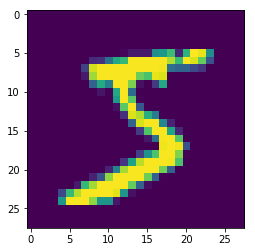

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set



In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Printing the output of the first 10 data after One Hot Encoding

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # 26


model.add(Conv2D(64, (3, 3), activation='relu')) # 24
model.add(Conv2D(32, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D()) # 11
model.add(Conv2D(32, (1, 1), activation='relu')) # 11

model.add(Conv2D(64, (3, 3), activation='relu')) # 9
model.add(Conv2D(32, (3, 3), activation='relu')) # 7

model.add(Conv2D(32, (3, 3), activation='relu')) # 5
model.add(Conv2D(32, (3, 3), activation='relu')) # 3

model.add(Conv2D(10, 1, activation='relu')) #3
model.add(Conv2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        1056      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 32)          18464     
__________


Compiling the model based on following:

1. Optimization method: We are using 'SGD' optimization method here.

2. For loss function we are using: binary crossentropy

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Start training the model:

1. Batch size: set to 32
2. Epochs: set to 10

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.3248 - acc: 0.9000
Epoch 2/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.3241 - acc: 0.9000
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.3215 - acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.2591 - acc: 0.9124
Epoch 5/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0954 - acc: 0.9660
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0588 - acc: 0.9799
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0454 - acc: 0.9845
Epoch 8/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0371 - acc: 0.9874
Epoch 9/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0314 - acc: 0.9894
Epoch 10/10
60000/60000 [==============================] - 11s 185us/step - loss: 

Evaluating the model performance



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing the model performance Score



In [0]:
print(score)

[0.02319128495072946, 0.9924300008773804]


# Observations


*   Wrong implementation of kernels in convolution blocks
*   SGD optimizer used instead of Adam
*   Repeated 3x3 input size convolving done which is not recomended



In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.6775397e-06 6.4568508e-06 1.4116993e-03 4.5542038e-04 1.1364973e-07
  3.4317807e-05 9.3388941e-10 9.9773383e-01 1.5381479e-04 2.0174775e-04]
 [5.3846321e-05 4.8981624e-06 9.9558455e-01 3.7374655e-03 3.2226516e-10
  3.9396578e-05 3.5544639e-04 1.2466767e-08 2.2446370e-04 6.6504159e-12]
 [1.3826106e-05 9.9248332e-01 1.2421017e-03 2.1105417e-04 1.3083486e-03
  6.3583464e-04 8.8657405e-05 1.8612806e-03 1.8858754e-03 2.6961876e-04]
 [9.9924314e-01 8.3872447e-09 1.8494902e-04 9.2345967e-05 3.7128837e-07
  1.6049230e-04 2.7814225e-04 3.9990784e-05 3.3624207e-07 2.3514390e-07]
 [4.0522812e-07 2.2680827e-07 5.2611808e-06 4.6305567e-07 9.9053615e-01
  2.8431994e-05 7.4290809e-05 2.1636339e-05 4.4383196e-07 9.3326559e-03]
 [3.2163160e-07 9.9765539e-01 6.5570879e-05 1.4160938e-05 5.1218015e-04
  4.3151838e-05 1.1164527e-06 9.4252068e-04 5.5451709e-04 2.1105705e-04]
 [2.1705530e-06 1.0081118e-06 2.2351182e-06 1.7495441e-06 9.8408693e-01
  2.3989410e-03 4.9568388e-07 4.6602843e-04 1.3088669e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

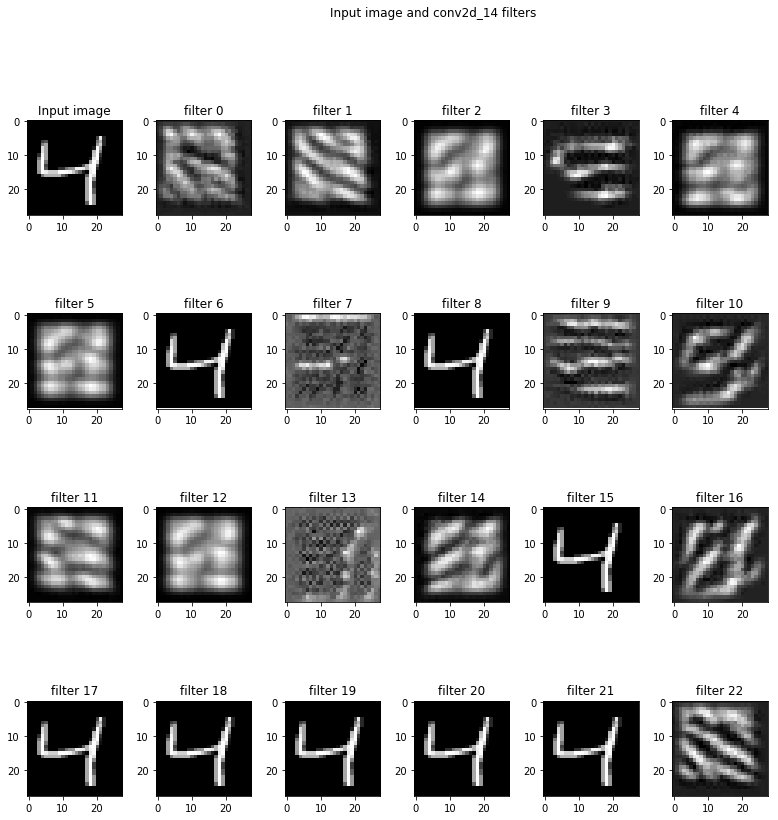

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()